https://github.com/grammaloreto/Bioactivity/blob/main/target_inhibitor/bortezomib.ipynb

trobar molecules semblants a un inhibidor conegut

In [1]:

! pip install chembl_webresource_client

  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
  Attempting uninstall: requests-cache
    Found existing installation: requests-cache 0.9.8
    Uninstalling requests-cache-0.9.8:
      Successfully uninstalled requests-cache-0.9.8


In [2]:
# Dependencies
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client.utils import utils
from IPython.display import SVG
import pandas as pd
import json

In [3]:
# Searching the molecule by Bortezomib/Velcade ChEMBL id
molecule = new_client.molecule
m = molecule.filter(chembl_id='CHEMBL1951048')
mlmol = pd.DataFrame.from_dict(m)
mlmol

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,...,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,[],-1,None,0,None,0,-1,"[{'xref_id': '103023280', 'xref_name': 'SID: 1...",False,None,...,None,-1,MOL,False,False,None,None,None,None,False


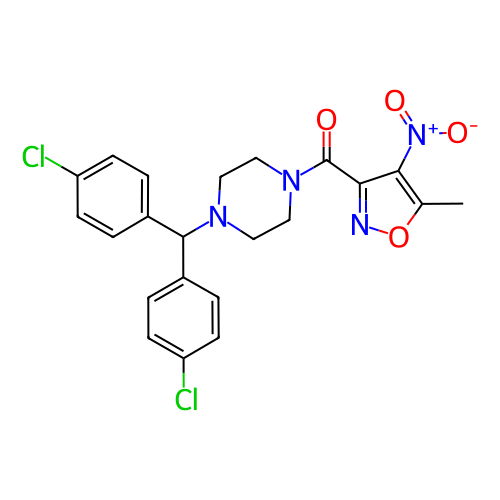

In [4]:
# Molecule Image of Bortezomib
image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL1951048'))

In [5]:
#Molecular descriptors (with ML210 Canonical SMILES)
ml210 = utils.smiles2ctab('Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]')
descs = json.loads(utils.chemblDescriptors(ml210))[0]
descs

{'qed': 0.3909151842443306,
 'MolWt': 475.3320000000002,
 'TPSA': 92.72,
 'HeavyAtomCount': 32,
 'NumAromaticRings': 3,
 'NumHAcceptors': 6,
 'NumHDonors': 0,
 'NumRotatableBonds': 5,
 'MolLogP': 4.745420000000005,
 'MolecularFormula': 'C22H20Cl2N4O4',
 'Ro3Pass': None,
 'NumRo5': 0,
 'MonoisotopicMolWt': 474.08616048}

In [6]:
# Compute structural alerts that can be related to Bortezomib
#  structural alerts are high chemical reactivity molecular fragments that can be transformed via bioactivation by 
#  human enzymes into fragments with high chemical reactivity.

mol = utils.smiles2ctab("Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]")
alerts = json.loads(utils.structuralAlerts(mol))
for a in alerts[0]:
    print(a)

{'alert_id': 123, 'alert_name': 'nitro group', 'set_name': 'Dundee', 'smarts': '[N+](=O)[O-]'}
{'alert_id': 127, 'alert_name': 'Oxygen-nitrogen single bond', 'set_name': 'Dundee', 'smarts': '[OR0,NR0][OR0,NR0]'}
{'alert_id': 1005, 'alert_name': 'b-carbonyl quaternary nitrogen', 'set_name': 'MLSMR', 'smarts': 'C(=O)CC[N+,n+]'}
{'alert_id': 1075, 'alert_name': 'nitroalkane', 'set_name': 'MLSMR', 'smarts': 'C[N+](=O)[O-]'}


In [7]:
#calculate the parent molecule of ml210

par = json.loads(utils.getParent(mol))
parent = pd.DataFrame(par)
parent

,parent_molblock,exclude
0,\n RDKit 2D\n\n 32 35 0 0 0 0...,False


In [8]:
# Find compounds similar to ml210 with similarity threshold of 70%
similarity = new_client.similarity
res = similarity.filter(smiles="Cc1onc(C(=O)N2CCN(C(c3ccc(Cl)cc3)c3ccc(Cl)cc3)CC2)c1[N+](=O)[O-]", similarity=70).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL1951048', 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL1951049', 'similarity': '92.15686321258544921875'}
{'molecule_chembl_id': 'CHEMBL1951046', 'similarity': '80.76922893524169921875'}
{'molecule_chembl_id': 'CHEMBL1586255', 'similarity': '80.392158031463623046875'}
{'molecule_chembl_id': 'CHEMBL1951045', 'similarity': '78.846156597137451171875'}
{'molecule_chembl_id': 'CHEMBL1951047', 'similarity': '77.777779102325439453125'}
{'molecule_chembl_id': 'CHEMBL1951042', 'similarity': '74.54545497894287109375'}


In [9]:
#Find compounds similar to ml210 with similarity threshold of 90%
similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL1951048', similarity=90).only(['molecule_chembl_id', 'pref_name', 'similarity'])
res
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL1951049', 'pref_name': None, 'similarity': '92.15686321258544921875'}


In [10]:
#Get all activities for ml210
activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL1951048", pchembl_value__isnull=False)

len(res)

21

In [11]:
# get a DataFrame with all Bortezomib activities
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,8031448,[],CHEMBL1953327,Cytotoxicity against human BJeLR cells express...,F,None,None,BAO_0000190,...,None,NON-PROTEIN TARGET,None,None,None,IC50,uM,UO_0000065,None,0.071
1,None,None,8031465,[],CHEMBL1953326,Cytotoxicity against human BJeH-LT cells after...,A,None,None,BAO_0000190,...,None,ADMET,None,None,None,IC50,uM,UO_0000065,None,0.272
2,None,None,8031541,[],CHEMBL1953334,Cytotoxicity against human BJ cells expressing...,F,None,None,BAO_0000190,...,Homo sapiens,BJ,9606,None,None,IC50,nM,UO_0000065,None,107.0
3,None,None,8031543,[],CHEMBL1953333,Cytotoxicity against human BJeH cells after 48...,A,None,None,BAO_0000190,...,None,ADMET,None,None,None,IC50,nM,UO_0000065,None,628.0
4,None,active,14175743,[],CHEMBL3215121,PubChem BioAssay. SNB-75 HRAS Target ID Cytoto...,F,None,None,BAO_0000186,...,None,Unchecked,None,None,None,AC50,uM,UO_0000065,None,0.723
5,None,active,14304182,[],CHEMBL3215290,PubChem BioAssay. CCRF CEM HRas Target ID Cyto...,F,None,None,BAO_0000186,...,None,NON-PROTEIN TARGET,None,None,None,AC50,uM,UO_0000065,None,0.234
6,None,active,14319575,[],CHEMBL3215263,PubChem BioAssay. U-251 HRAS Target ID Cytotox...,F,None,None,BAO_0000186,...,None,Unchecked,None,None,None,AC50,uM,UO_0000065,None,0.345
7,None,active,14343603,[],CHEMBL3214821,PubChem BioAssay. SR HRAS Target ID Cytotoxici...,F,None,None,BAO_0000186,...,None,Unchecked,None,None,None,AC50,uM,UO_0000065,None,0.181
8,None,active,14349460,[],CHEMBL3214802,PubChem BioAssay. HT-29 HRas Target ID Cytotox...,F,None,None,BAO_0000186,...,None,NON-PROTEIN TARGET,None,None,None,AC50,uM,UO_0000065,None,1.3
9,None,active,14403430,[],CHEMBL3214903,PubChem BioAssay. LOX IMVI HRas Target ID Cyto...,F,None,None,BAO_0000186,...,None,Unchecked,None,None,None,AC50,uM,UO_0000065,None,0.199


In [12]:
df.standard_type.unique()

array(['IC50', 'AC50', 'EC50'], dtype=object)